In [15]:
import pandas as pd

data = pd.read_csv("Data.csv")

data.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [17]:
data.fillna({
    'Weather': data['Weather'].mode()[0],
    'Traffic_Level': data['Traffic_Level'].mode()[0],
    'Time_of_Day': data['Time_of_Day'].mode()[0],
    'Courier_Experience_yrs': data['Courier_Experience_yrs'].median()
}, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [20]:
num_data = data[[ "Distance_km" , "Preparation_Time_min" , "Courier_Experience_yrs" , "Delivery_Time_min" ]]
num_data.corr()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007534,0.780998
Preparation_Time_min,-0.009037,1.000000,-0.030842,0.307350
Courier_Experience_yrs,-0.007534,-0.030842,1.000000,-0.089111
Delivery_Time_min,0.780998,0.307350,-0.089111,1.000000


## Countplots pour visualiser la distribution des variables catégorielles

<Axes: >

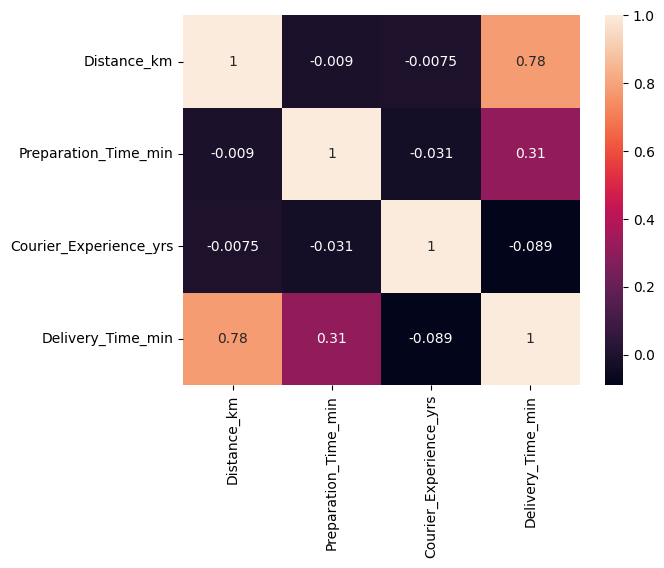

In [21]:
import seaborn as sns

sns.heatmap( num_data.corr() , annot=True )

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


## Countplots pour visualiser la distribution des variables catégorielles

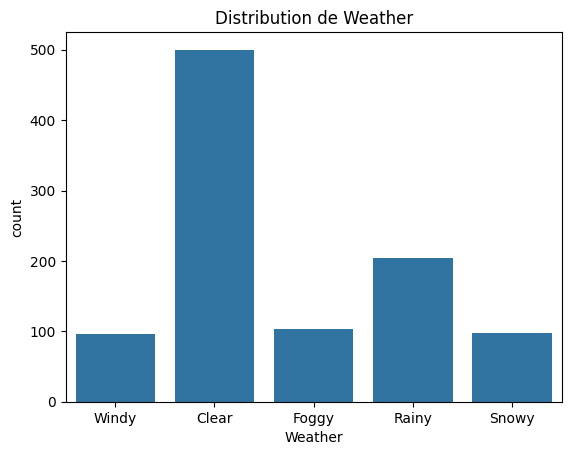

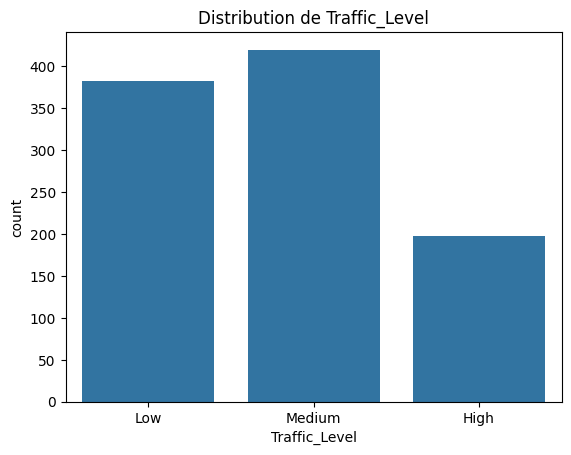

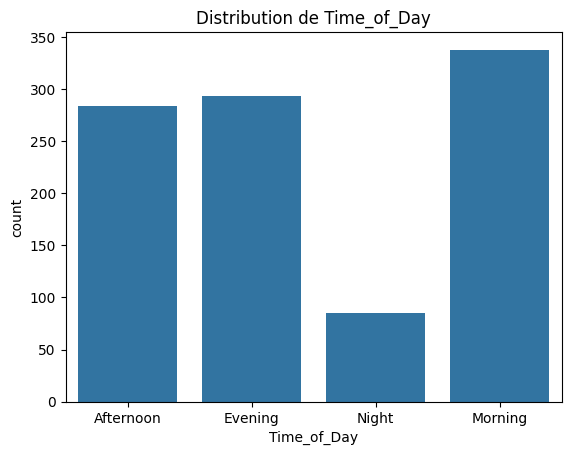

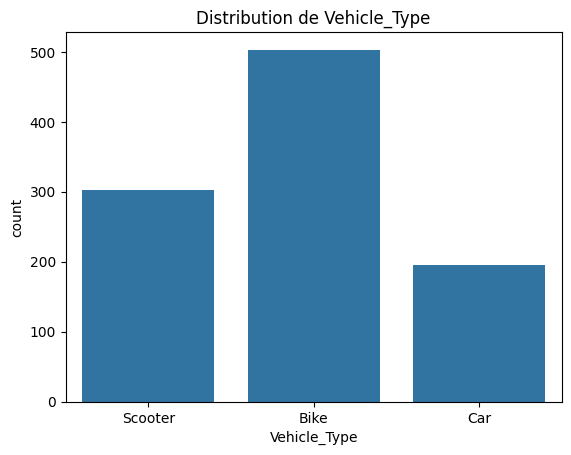

In [23]:
import matplotlib.pyplot as plt

categorial_cols = data[ ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'] ]
for col in categorial_cols:
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution de {col}")
    plt.show()

